# Dose Results

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../src')
import raybay
from utils import par_names, get_dose_df, get_percent_diff, heatmap

## Full 100 Iterations

In [2]:
full_df = pd.concat([get_dose_df(plan_type) for plan_type in ['clinical', 'random', 'bayes']])
full_df.groupby(['dose_name', 'plan_type'])['dose_val'].describe()

count         mean          std          min  \
dose_name             plan_type                                                 
10_SpinalCord_MaxDVH  bayes       10.0   447.452567   145.392724   220.757532   
                      clinical    10.0   962.580259   526.320073   265.033790   
                      random      10.0   594.958876   227.711040   223.914544   
11_SpinalCord_MaxDose bayes       10.0   703.760588   328.344550   253.718079   
                      clinical    10.0  1220.050488   707.911458   315.778000   
                      random      10.0   812.224387   364.737170   262.147980   
1_Chestwall_MaxDVH    bayes       10.0  2211.581853   456.918740  1651.997236   
                      clinical    10.0  2213.491370   377.905211  1665.838022   
                      random      10.0  2238.529863   485.154521  1634.359868   
2_D2cm_MaxDose        bayes       10.0  2581.496782   235.978445  2349.426270   
                      clinical    10.0  2827.429706   712.423734  2321.516357   
                      random      10.0  2520.811862   236.554510  2256.229492   
3_Esophagus_MaxDVH    bayes       10.0   455.141414   279.773822    84.946228   
                      clinical    10.0   365.552510   198.664484   116.129008   
                      random      10.0   417.877848   205.031207    93.327185   
4_Lungs_MaxDVH        bayes       10.0    68.614280    76.056345    13.141909   
                      clinical    10.0    68.351877    82.148902    12.869589   
                      random      10.0    67.968160    71.057841    13.878679   
5_Lungs_MaxDVH        bayes       10.0   146.002756   113.106330    27.417393   
                      clinical    10.0   132.954377   113.179787    27.435992   
                      random      10.0   151.938867   112.906912    30.543015   
7_PTV_MaxDose         bayes       10.0  7146.276985   385.648095  6505.124023   
                      clinical    10.0  6784.967125   840.565515  5897.977051   
                      random      10.0  7095.350567   323.565649  6679.728027   
8_Rib_MaxDVH          bayes       10.0  3141.625959   895.434123  2112.293300   
                      clinical    10.0  3465.115452   891.595498  2311.379703   
                      random      10.0  3190.978911   790.920814  2340.192849   
9_Rib_MaxDose         bayes       10.0  4478.729875  1349.672470  2648.041748   
                      clinical    10.0  4717.237702  1135.317806  3062.360528   
                      random      10.0  4515.953504  1156.076086  2781.295898   

                                         25%          50%          75%  \
dose_name             plan_type                                          
10_SpinalCord_MaxDVH  bayes       369.416414   418.172982   512.956102   
                      clinical    684.650965   871.041300  1217.526958   
                      random      413.930958   637.503614   741.033345   
11_SpinalCord_MaxDose bayes       444.217979   663.195343   996.820709   
                      clinical    812.829694  1099.297415  1628.339277   
                      random      511.298790   819.074158  1070.213974   
1_Chestwall_MaxDVH    bayes      1919.560152  2112.828154  2568.840302   
                      clinical   1932.207474  2252.075721  2402.387757   
                      random     1935.787173  2108.711108  2580.918920   
2_D2cm_MaxDose        bayes      2380.616821  2546.469116  2676.607880   
                      clinical   2381.644292  2587.827079  2984.870924   
                      random     2319.452332  2479.777100  2719.137260   
3_Esophagus_MaxDVH    bayes       214.958536   470.937882   627.035858   
                      clinical    213.350509   348.110062   495.384585   
                      random      213.536074   524.228842   584.235692   
4_Lungs_MaxDVH        bayes        16.114903    62.953231    74.490415   
                      clinical     14.167678    53.909187    64.422450   
                      random      

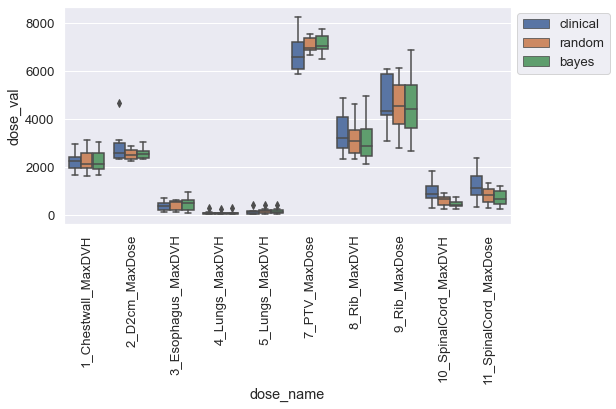

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='dose_val', hue='plan_type', data=full_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

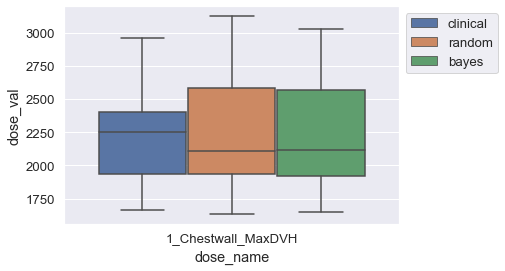

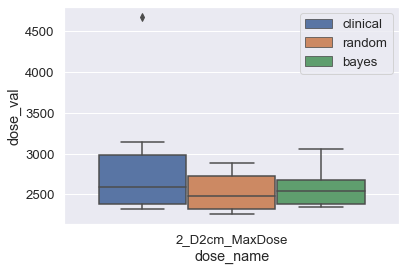

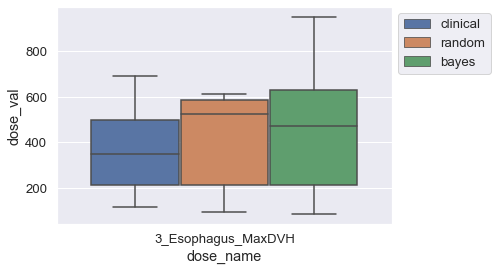

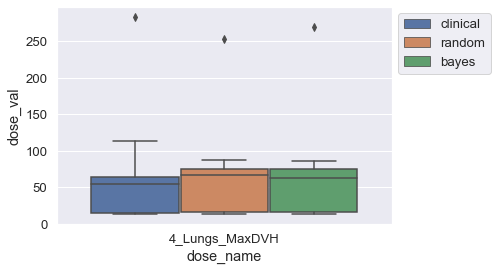

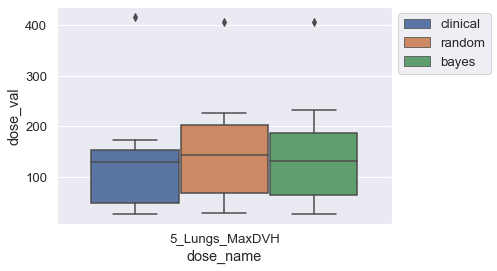

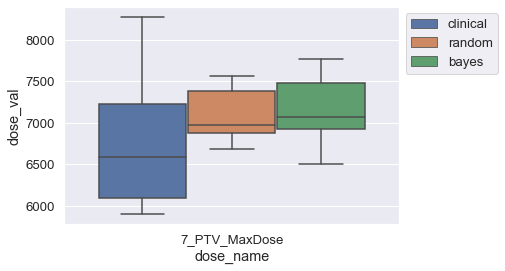

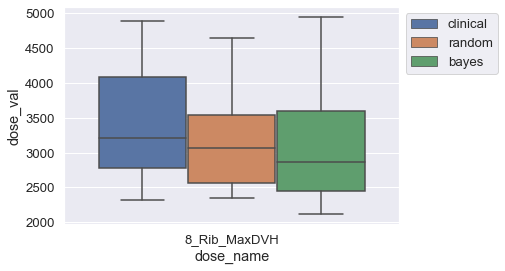

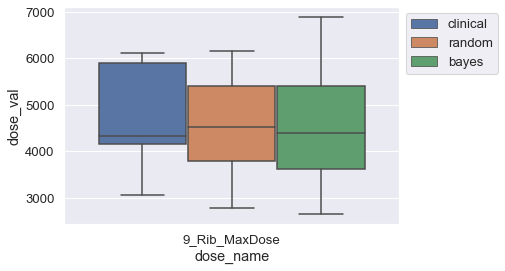

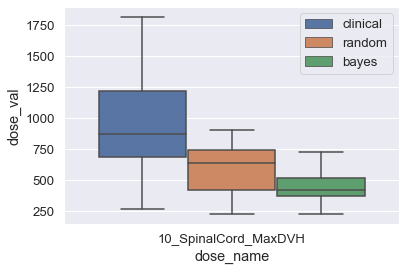

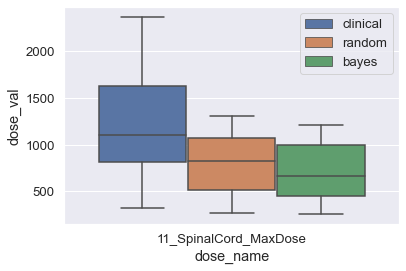

In [4]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='dose_val', hue='plan_type', data=full_df[full_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Compare to goal values

In [5]:
def get_goal_diff(row):
    return get_percent_diff(row, 'dose_val', 'goal_val')

full_df['goal_diff'] = full_df.apply(get_goal_diff, axis=1)
full_df.groupby(['dose_name', 'plan_type'])['goal_diff'].describe()

count       mean        std        min  \
dose_name             plan_type                                           
10_SpinalCord_MaxDVH  bayes       10.0 -67.099076  10.690642 -83.767829   
                      clinical    10.0 -29.222040  38.700005 -80.512221   
                      random      10.0 -56.253024  16.743459 -83.535695   
11_SpinalCord_MaxDose bayes       10.0 -72.932285  12.628637 -90.241612   
                      clinical    10.0 -53.074981  27.227364 -87.854692   
                      random      10.0 -68.760600  14.028353 -89.917385   
1_Chestwall_MaxDVH    bayes       10.0 -26.280605  15.230625 -44.933425   
                      clinical    10.0 -26.216954  12.596840 -44.472066   
                      random      10.0 -25.382338  16.171817 -45.521338   
2_D2cm_MaxDose        bayes       10.0  -0.198588   5.229875  -9.765839   
                      clinical    10.0   9.840739  30.545785  -9.273945   
                      random      10.0  -2.506198   6.510575 -11.200853   
3_Esophagus_MaxDVH    bayes       10.0 -75.790350  14.881586 -95.481584   
                      clinical    10.0 -80.555718  10.567260 -93.822925   
                      random      10.0 -77.772455  10.905915 -95.035788   
4_Lungs_MaxDVH        bayes       10.0 -94.084976   6.556581 -98.867077   
                      clinical    10.0 -94.107597   7.081802 -98.890553   
                      random      10.0 -94.140676   6.125676 -98.803562   
5_Lungs_MaxDVH        bayes       10.0 -88.225584   9.121478 -97.788920   
                      clinical    10.0 -89.277873   9.127402 -97.787420   
                      random      10.0 -87.746866   9.105396 -97.536854   
7_PTV_MaxDose         bayes       10.0 -10.671538   4.820601 -18.685950   
                      clinical    10.0 -15.187911  10.507069 -26.275287   
                      random      10.0 -11.308118   4.044571 -16.503400   
8_Rib_MaxDVH          bayes       10.0  -1.824189  27.982316 -33.990834   
                      clinical    10.0   8.284858  27.862359 -27.769384   
                      random      10.0  -0.281909  24.716275 -26.868973   
9_Rib_MaxDose         bayes       10.0  11.968247  33.741812 -33.798956   
                      clinical    10.0  17.930943  28.382945 -23.440987   
                      random      10.0  12.898838  28.901902 -30.467603   

                                       25%        50%        75%        max  
dose_name             plan_type                                              
10_SpinalCord_MaxDVH  bayes     -72.837028 -69.251987 -62.282640 -46.912742  
                      clinical  -49.658017 -35.952846 -10.475959  33.848252  
                      random    -69.563900 -53.124734 -45.512254 -33.816400  
11_SpinalCord_MaxDose bayes     -82.914693 -74.492487 -61.660742 -53.556023  
                      clinical  -68.737319 -57.719330 -37.371566  -8.828313  
                      random    -80.334662 -68.497148 -58.837924 -49.584805  
1_Chestwall_MaxDVH    bayes     -36.014662 -29.572395 -14.371990   0.836173  
                      clinical  -35.593084 -24.930809 -19.920408  -1.331335  
                      random    -35.473761 -29.709630 -13.969369   4.127405  
2_D2cm_MaxDose        bayes      -2.158475  -1.588969   1.817615   7.723211  
                      clinical   -3.138505   3.315891   4.701940  94.904413  
                      random     -6.068705  -4.564679  -1.406782   9.496489  
3_Esophagus_MaxDVH    bayes     -88.566035 -74.950113 -66.647029 -49.472683  
                      clinical  -88.651569 -81.483507 -73.649756 -63.349724  
                      random    -88.641698 -72.115487 -68.923633 -67.546816  
4_Lungs_MaxDVH        bayes     -98.610784 -94.572997 -93.578412 -76.785862  
                      clinical  -98.778648 -95.352656 -94.446341 -75.561520  
                      random    -98.566401 -94.303007 -93.597158 -78.226324  
5_Lungs_MaxDVH        bayes     -94.696665 -89.371905 -84.868325 -67.312

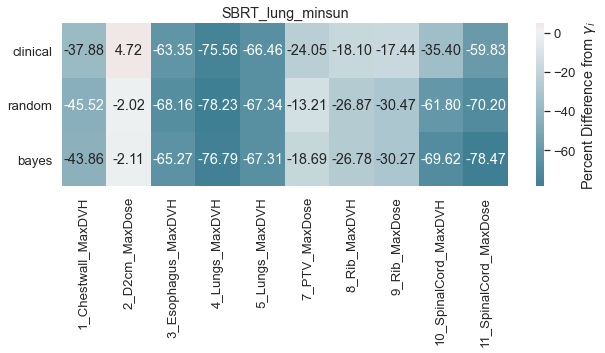

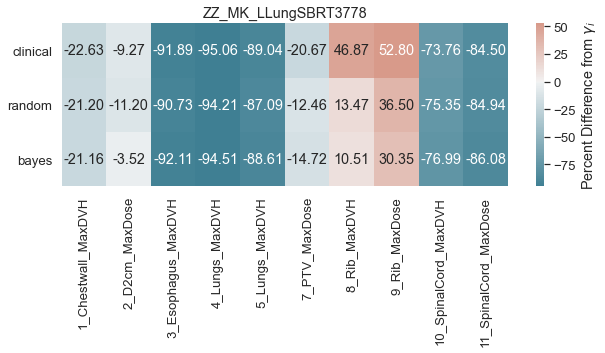

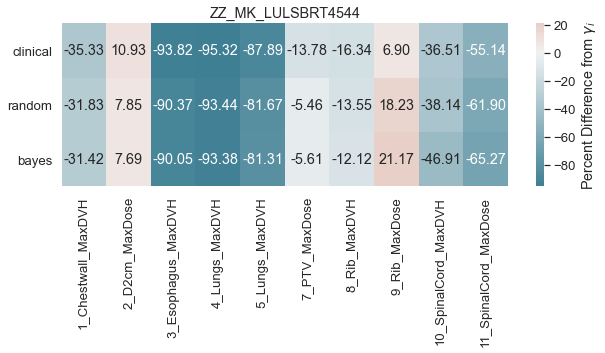

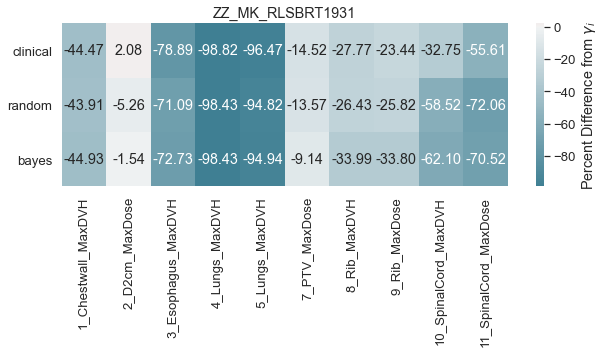

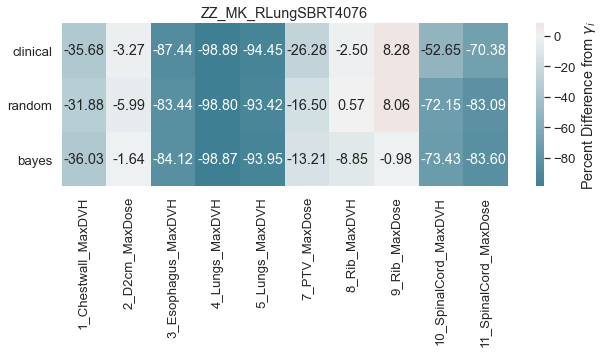

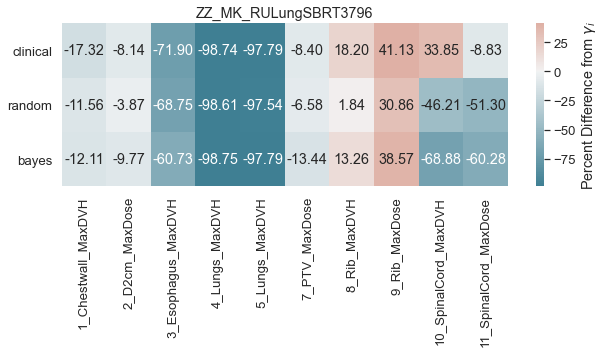

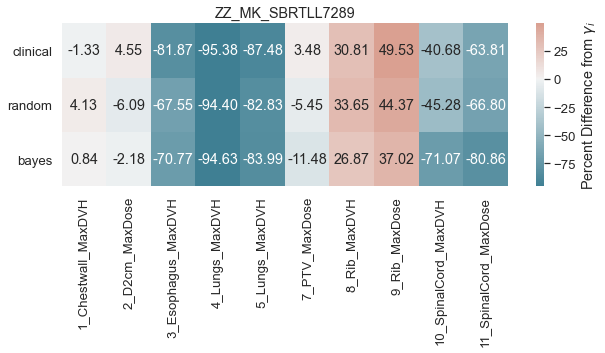

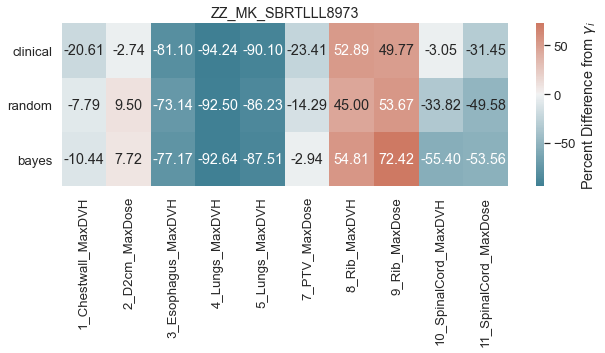

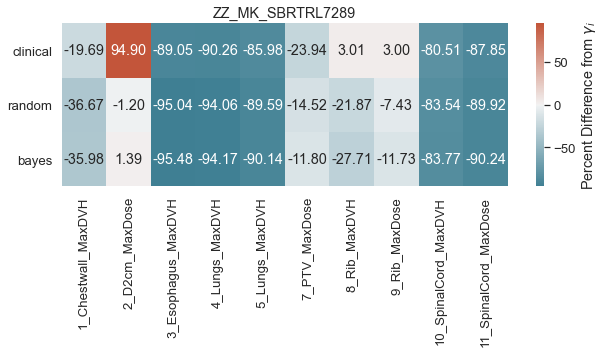

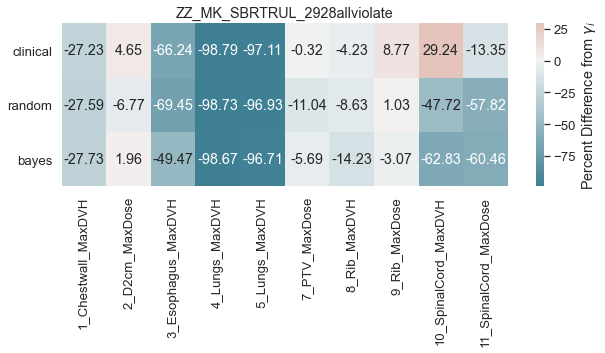

In [6]:
heatmap(full_df, 'plan_type', ['clinical', 'random', 'bayes'], 'goal_diff', '$\gamma_i$')

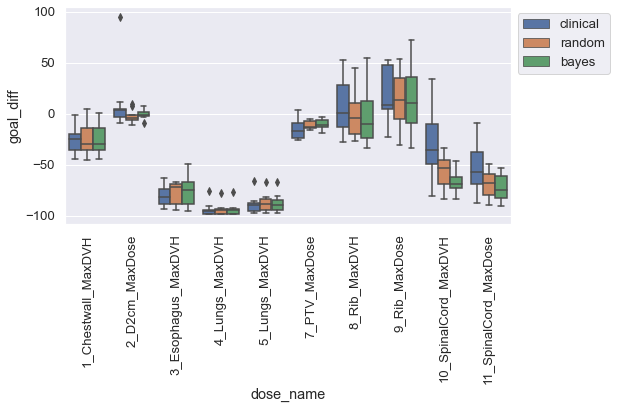

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='goal_diff', hue='plan_type', data=full_df, ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

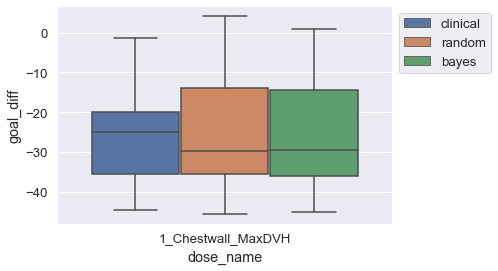

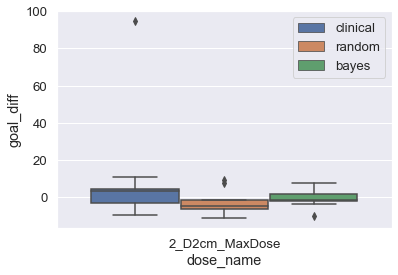

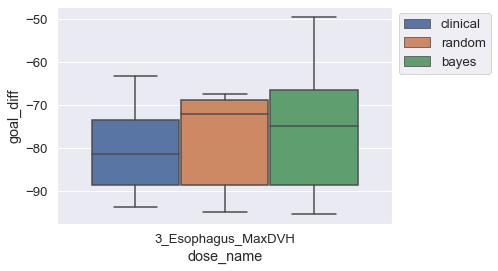

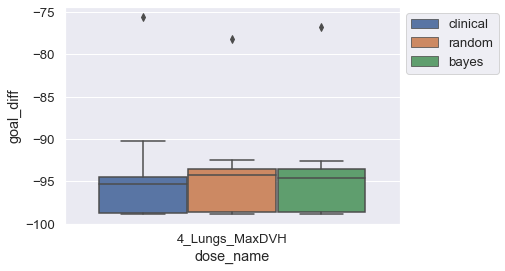

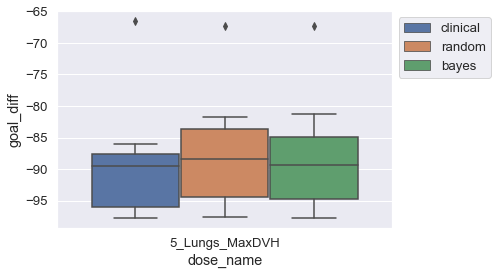

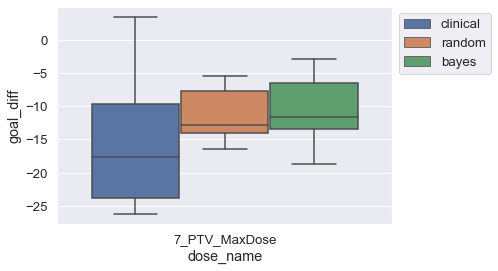

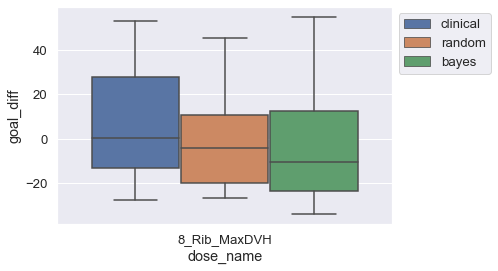

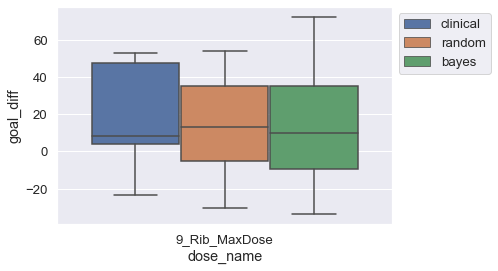

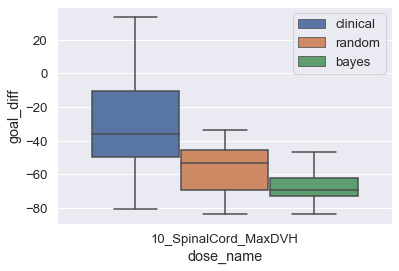

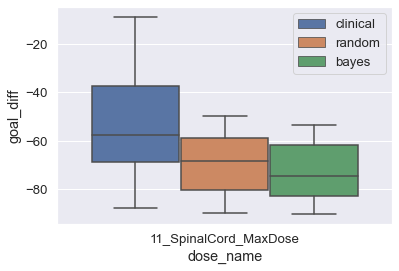

In [8]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='goal_diff', hue='plan_type', data=full_df[full_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Compare plans

In [9]:
def get_plan_diff(row):
    return get_percent_diff(row, 'dose_val_x', 'dose_val_y')

def get_compare(plan, ref, stop=False):
    df = pd.merge(
        get_dose_df(plan, stop),
        get_dose_df(ref, stop),
        on=['patient', 'dose_name'])
    df['compare_type'] = plan + '2' + ref
    df['plan_diff'] = df.apply(get_plan_diff, axis=1)
    return df[['patient', 'dose_name', 'compare_type', 'plan_diff']]

pair_list = [['random', 'clinical'], ['bayes', 'clinical'], ['bayes', 'random']]
compare_df = pd.concat([get_compare(*pair) for pair in pair_list]).reset_index(drop=True)
compare_df.groupby(['compare_type', 'dose_name']).describe()

plan_diff                        \
                                          count       mean        std   
compare_type    dose_name                                               
bayes2clinical  10_SpinalCord_MaxDVH       10.0 -43.908530  22.511695   
                11_SpinalCord_MaxDose      10.0 -36.716295  15.599948   
                1_Chestwall_MaxDVH         10.0  -0.269497   9.150103   
                2_D2cm_MaxDose             10.0  -5.295168  15.969302   
                3_Esophagus_MaxDVH         10.0  22.152441  36.636976   
                4_Lungs_MaxDVH             10.0   9.619163  23.097052   
                5_Lungs_MaxDVH             10.0  14.652739  24.305584   
                7_PTV_MaxDose              10.0   6.538658  12.288355   
                8_Rib_MaxDVH               10.0  -9.165740  10.820122   
                9_Rib_MaxDose              10.0  -5.921799  11.382523   
bayes2random    10_SpinalCord_MaxDVH       10.0 -20.669129  16.280070   
                11_SpinalCord_MaxDose      10.0 -11.975522  13.962678   
                1_Chestwall_MaxDVH         10.0  -0.994602   2.582760   
                2_D2cm_MaxDose             10.0   2.537495   4.708588   
                3_Esophagus_MaxDVH         10.0   4.497637  24.729245   
                4_Lungs_MaxDVH             10.0  -1.665620   4.938758   
                5_Lungs_MaxDVH             10.0  -4.434916   6.071123   
                7_PTV_MaxDose              10.0   0.873623   6.640789   
                8_Rib_MaxDVH               10.0  -2.118592   7.061809   
                9_Rib_MaxDose              10.0  -1.654559   6.930765   
random2clinical 10_SpinalCord_MaxDVH       10.0 -30.335673  21.364692   
                11_SpinalCord_MaxDose      10.0 -27.328446  16.695447   
                1_Chestwall_MaxDVH         10.0   0.888346  10.536623   
                2_D2cm_MaxDose             10.0  -7.450935  16.303971   
                3_Esophagus_MaxDVH         10.0  19.400677  38.477597   
                4_Lungs_MaxDVH             10.0  11.618915  23.351977   
                5_Lungs_MaxDVH             10.0  20.002087  24.078436   
                7_PTV_MaxDose              10.0   5.552614   9.199686   
                8_Rib_MaxDVH               10.0  -7.069596  10.455798   
                9_Rib_MaxDose              10.0  -4.454794   7.535672   

                                                                        \
                                             min        25%        50%   
compare_type    dose_name                                                
bayes2clinical  10_SpinalCord_MaxDVH  -76.751439 -53.737427 -47.553604   
                11_SpinalCord_MaxDose -56.432580 -46.924924 -39.114965   
                1_Chestwall_MaxDVH    -20.277728  -0.794273   0.681840   
                2_D2cm_MaxDose        -47.978619  -5.712153  -2.746604   
                3_Esophagus_MaxDVH    -58.720034   3.211857  27.836150   
                4_Lungs_MaxDVH        -40.198801   0.184296  10.502539   
                5_Lungs_MaxDVH        -29.622139   0.943098  11.603689   
                7_PTV_MaxDose         -14.457790  -2.470836   7.280077   
                8_Rib_MaxDVH          -29.815960 -10.567117  -7.564714   
                9_Rib_MaxDose         -15.541948 -14.107209  -9.722415   
bayes2random    10_SpinalCord_MaxDVH  -47.129231 -31.677137 -17.325122   
                11_SpinalCord_MaxDose -42.345795 -16.041696  -7.709616   
                1_Chestwall_MaxDVH     -6.085761  -2.606818  -0.408663   
                2_D2cm_MaxDose         -6.137108  -0.133589   3.277315   
                3_Esophagus_MaxDVH    -14.991299  -9.705187  -4.868068   
                4_Lungs_MaxDVH         -9.981215  -5.007810  -1.918518   
                5_Lungs_MaxDVH        -11.762046  -8.982073  -5.976183   
                7_PTV_MaxDose          -7.343666  -5.380102   1.514611   
                8_Rib_MaxDVH          -10.277395  -7.136587  -3.843049   


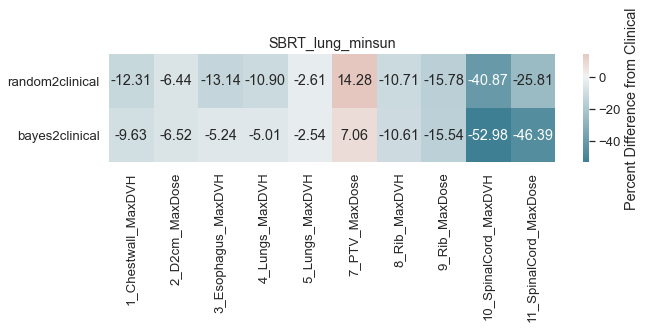

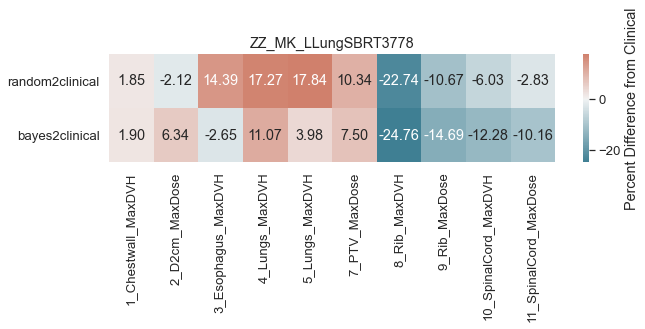

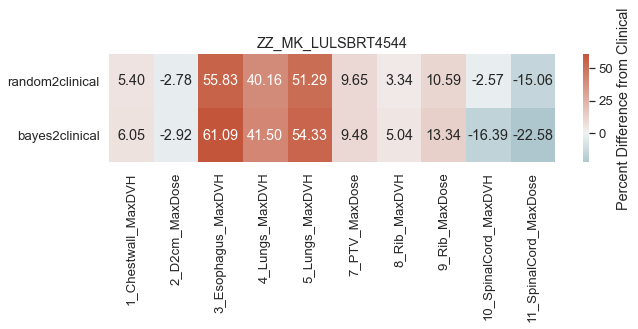

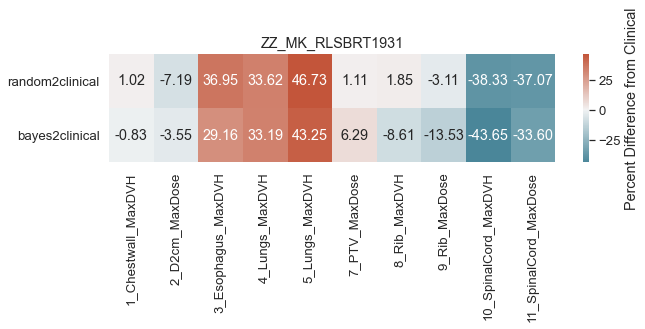

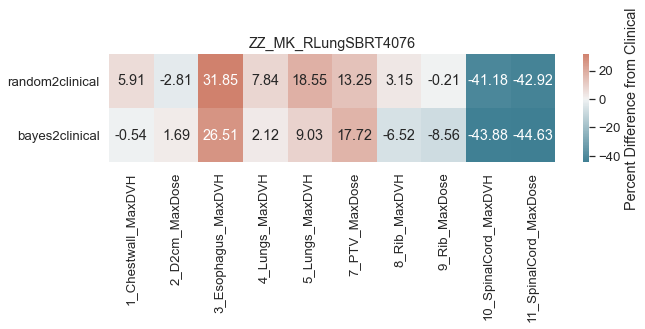

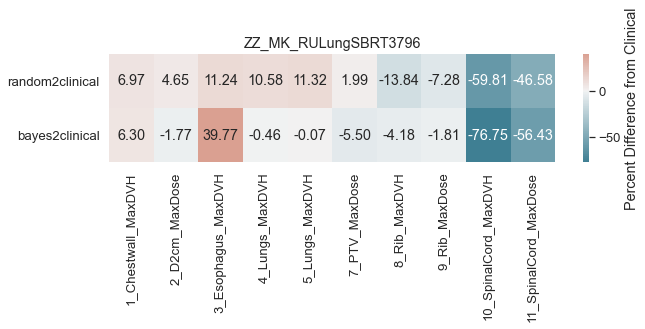

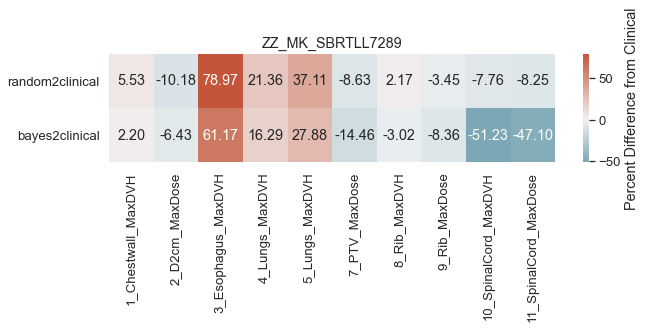

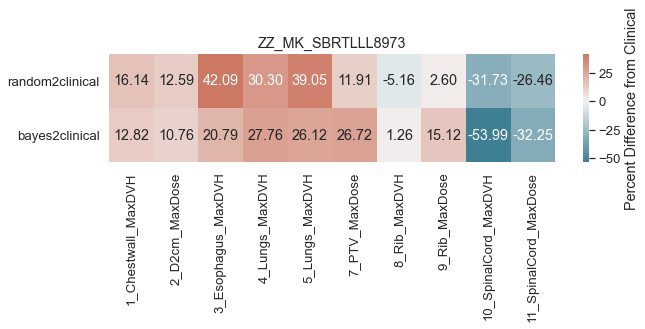

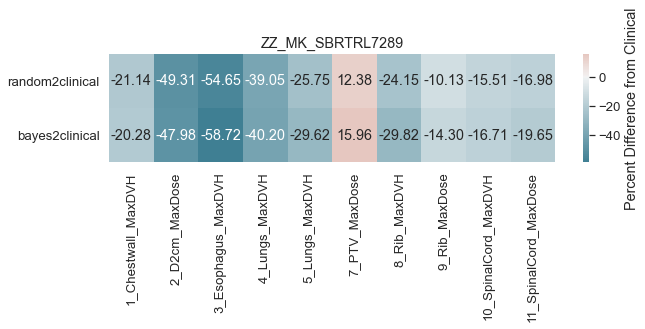

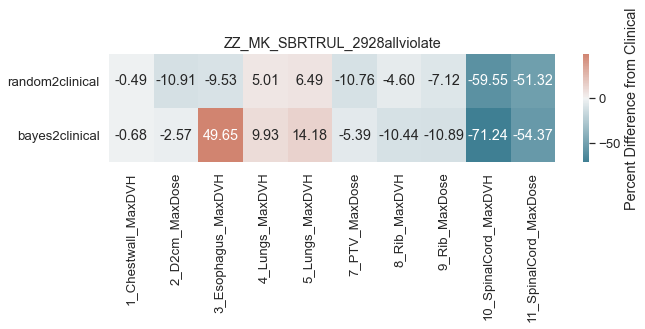

In [10]:
heatmap(compare_df, 'compare_type', ['random2clinical', 'bayes2clinical'], 'plan_diff', 'Clinical')

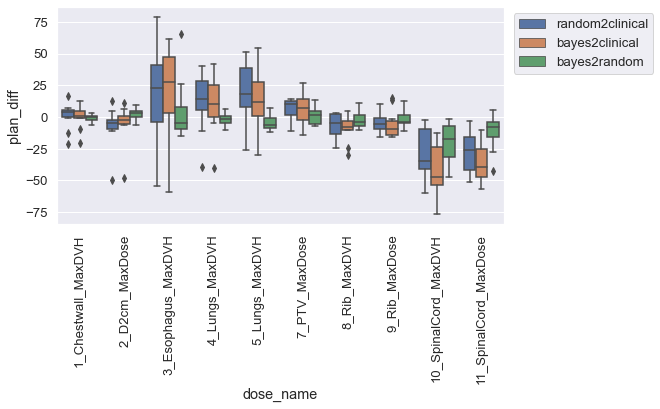

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='plan_diff', hue='compare_type', data=compare_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.35, 1));

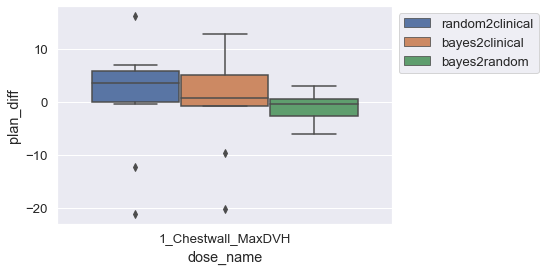

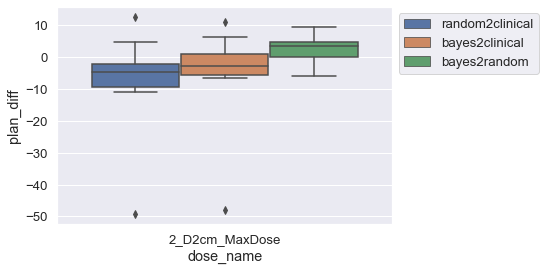

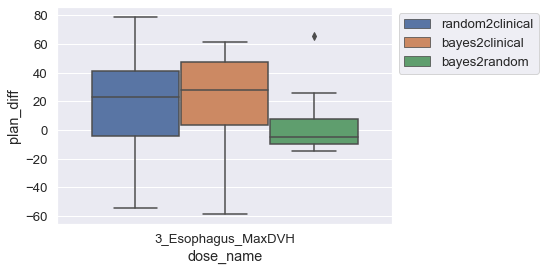

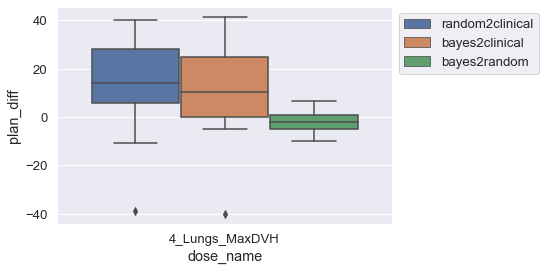

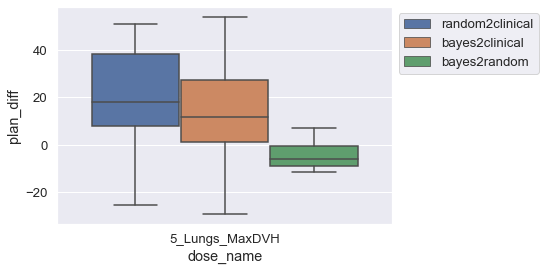

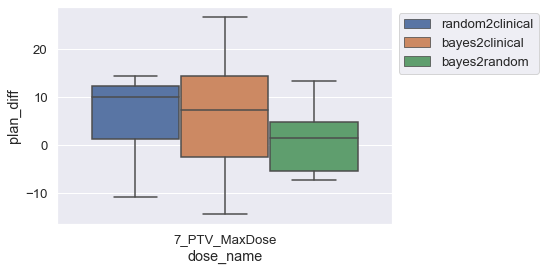

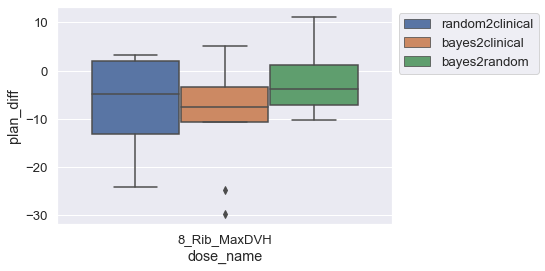

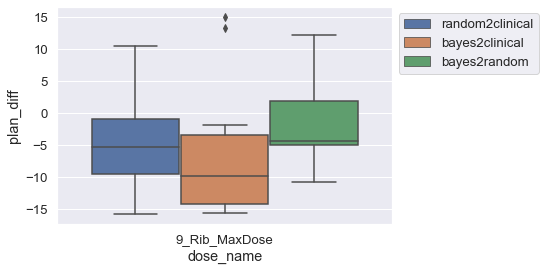

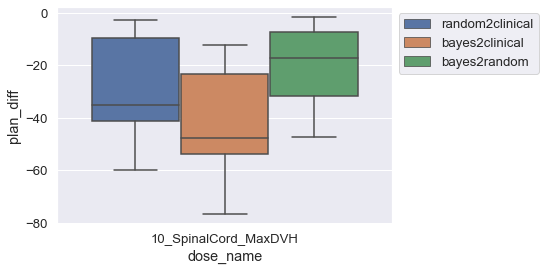

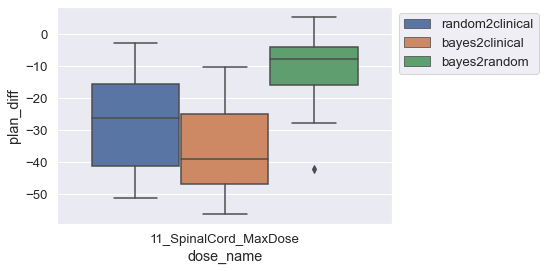

In [12]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='plan_diff', hue='compare_type', data=compare_df[compare_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Various questions in paper (e.g., when one higher than other plan, how compare to gamma?)

In [13]:
# Where random plan doses are worse than clinical plan doses, how do they compare to gamma?
# Where clinical plan doses are worse than random plan doses, how do they compare to gamma?
# Where Bayesian plan doses are worse than clinical plan doses, how do they compare to gamma?
# Where clinical plan doses are worse than Bayesian plan doses, how do they compare to gamma?
# Where clinical plan doses were worse than gamma, how do they compare with random and Bayesian plans?
# Where random plan doses were worse than gamma, how do they compare to clinical and Bayesian plans?
# Where Bayesian plan doses were worse than gamma, how do they compare to clinical and random plans?

# def get_compare(plan, ref):
#     df = pd.merge(
#         get_dose_df(plan),
#         get_dose_df(ref),
#         on=['patient', 'dose_name'])
#     df['compare_type'] = plan + '2' + ref
#     df['percent_diff'] = df.apply(get_plan_diff, axis=1)
#     return df[['patient', 'dose_name', 'compare_type', 'percent_diff']]

# pair_list = [['random', 'clinical'], ['clinical', 'random'],
#              ['bayes', 'clinical'], ['clinical', 'bayes'],
#              ['random', 'bayes'], ['bayes', 'random']]
# compare_df = pd.concat([get_compare(*pair) for pair in pair_list]).reset_index(drop=True)
# compare_df.groupby(['compare_type', 'dose_name']).describe()

# def get_compare_name(row):
#     return row['plan_type'] + '2gamma'

# full_df['compare_type'] = full_df.apply(get_compare_name, axis=1)
# cols = ['patient', 'plan_type', 'dose_name', 'compare_type', 'dose_diff']

# compare_df = pd.merge(
#     full_df[cols].rename(columns={'dose_diff': 'percent_diff'}),
#     on=['patient', 'plan_type', 'dose_name'
# )

## With Stopping Conditions

In [14]:
stop_df = pd.concat([get_dose_df(plan_type, stop=True) for plan_type in ['clinical', 'random', 'bayes']])
stop_df.groupby(['dose_name', 'plan_type'])['dose_val'].describe()

count         mean          std          min  \
dose_name             plan_type                                                 
10_SpinalCord_MaxDVH  bayes       10.0   562.956077   238.966253   223.914544   
                      clinical    10.0   962.580259   526.320073   265.033790   
                      random      10.0   675.319381   346.710932   223.914544   
11_SpinalCord_MaxDose bayes       10.0   827.526935   379.109659   262.147980   
                      clinical    10.0  1220.050488   707.911458   315.778000   
                      random      10.0   977.639525   529.707719   262.147980   
1_Chestwall_MaxDVH    bayes       10.0  2187.862894   426.295651  1670.525235   
                      clinical    10.0  2213.491370   377.905211  1665.838022   
                      random      10.0  2201.230398   460.693018  1695.684308   
2_D2cm_MaxDose        bayes       10.0  2630.810528   311.132098  2279.141113   
                      clinical    10.0  2827.429706   712.423734  2321.516357   
                      random      10.0  2648.130540   330.683723  2304.464111   
3_Esophagus_MaxDVH    bayes       10.0   461.645908   299.853442    93.327185   
                      clinical    10.0   365.552510   198.664484   116.129008   
                      random      10.0   487.959871   313.778538    93.327185   
4_Lungs_MaxDVH        bayes       10.0    67.604128    74.034079    13.749885   
                      clinical    10.0    68.351877    82.148902    12.869589   
                      random      10.0    68.834479    78.307251    13.587186   
5_Lungs_MaxDVH        bayes       10.0   145.564092   108.803649    27.417393   
                      clinical    10.0   132.954377   113.179787    27.435992   
                      random      10.0   149.574634   113.619561    30.680599   
7_PTV_MaxDose         bayes       10.0  7498.438088   708.431736  6542.063965   
                      clinical    10.0  6784.967125   840.565515  5897.977051   
                      random      10.0  7789.916502  1052.682829  6364.934082   
8_Rib_MaxDVH          bayes       10.0  3130.999227   815.511729  2236.048770   
                      clinical    10.0  3465.115452   891.595498  2311.379703   
                      random      10.0  3254.334633  1069.606092  2136.971666   
9_Rib_MaxDose         bayes       10.0  4491.253420  1382.069251  2596.907715   
                      clinical    10.0  4717.237702  1135.317806  3062.360528   
                      random      10.0  4765.161140  1699.988403  2565.810547   

                                         25%          50%          75%  \
dose_name             plan_type                                          
10_SpinalCord_MaxDVH  bayes       422.328242   528.145198   707.330717   
                      clinical    684.650965   871.041300  1217.526958   
                      random      517.507205   571.310811   832.630179   
11_SpinalCord_MaxDose bayes       584.330078   837.213593  1020.566277   
                      clinical    812.829694  1099.297415  1628.339277   
                      random      651.338684   946.047882  1145.125061   
1_Chestwall_MaxDVH    bayes      1913.744150  2093.095406  2548.220651   
                      clinical   1932.207474  2252.075721  2402.387757   
                      random     1913.386286  2093.095449  2464.112400   
2_D2cm_MaxDose        bayes      2398.959656  2587.924683  2752.556910   
                      clinical   2381.644292  2587.827079  2984.870924   
                      random     2357.233276  2537.243164  2968.233942   
3_Esophagus_MaxDVH    bayes       213.068972   458.808586   581.848945   
                      clinical    213.350509   348.110062   495.384585   
                      random      201.269418   522.301514   685.151881   
4_Lungs_MaxDVH        bayes        16.217636    62.194092    74.491591   
                      clinical     14.167678    53.909187    64.422450   
                      random      

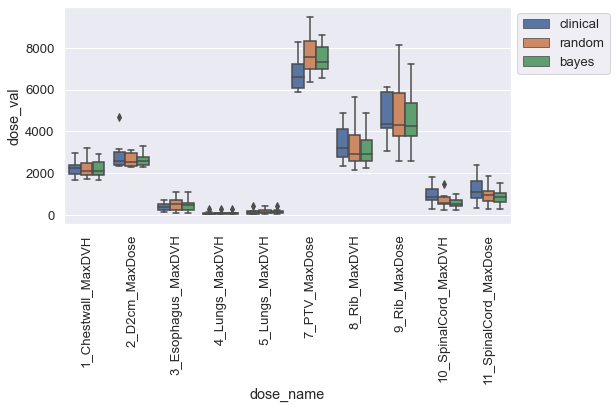

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='dose_val', hue='plan_type', data=stop_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

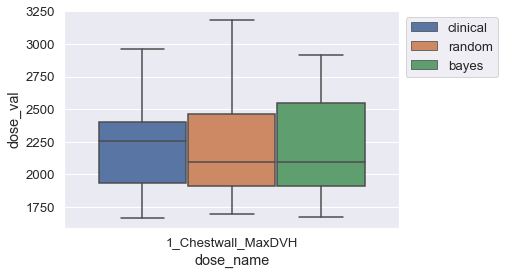

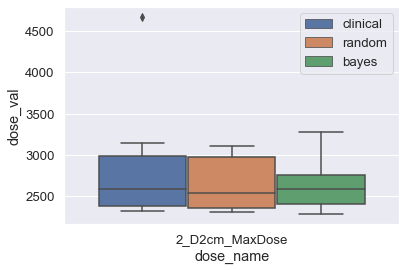

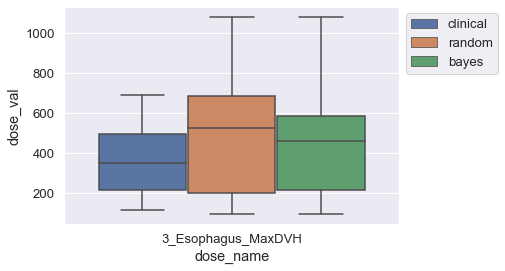

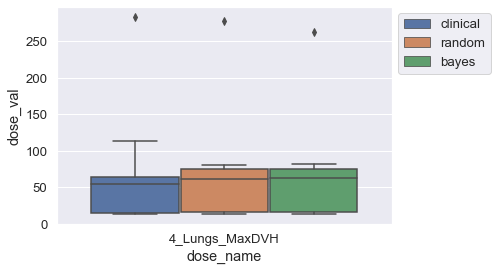

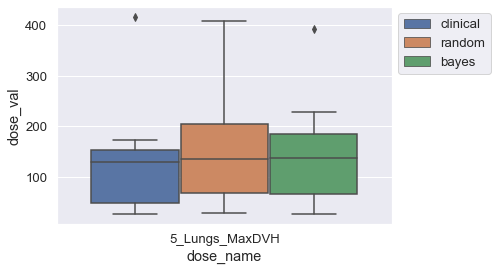

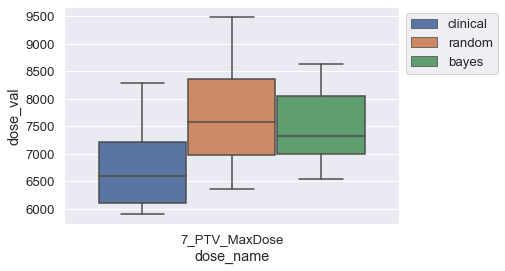

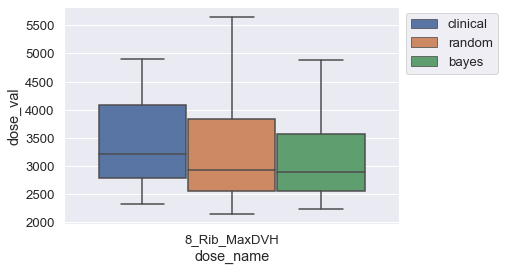

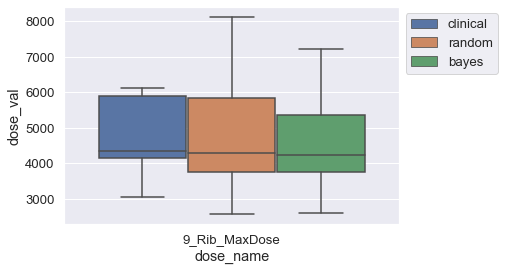

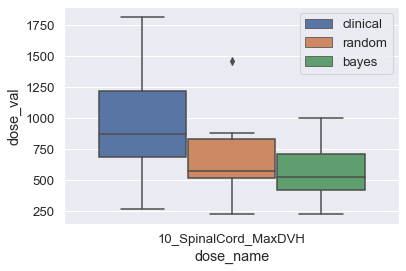

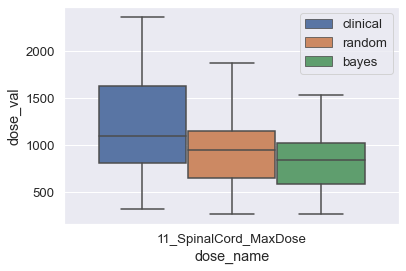

In [16]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='dose_val', hue='plan_type', data=stop_df[stop_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Compare to goal values

In [17]:
stop_df['goal_diff'] = stop_df.apply(get_goal_diff, axis=1)
stop_df.groupby(['dose_name', 'plan_type'])['goal_diff'].describe()

count       mean        std        min  \
dose_name             plan_type                                           
10_SpinalCord_MaxDVH  bayes       10.0 -58.606171  17.571048 -83.535695   
                      clinical    10.0 -29.222040  38.700005 -80.512221   
                      random      10.0 -50.344163  25.493451 -83.535695   
11_SpinalCord_MaxDose bayes       10.0 -68.172041  14.581141 -89.917385   
                      clinical    10.0 -53.074981  27.227364 -87.854692   
                      random      10.0 -62.398480  20.373374 -89.917385   
1_Chestwall_MaxDVH    bayes       10.0 -27.071237  14.209855 -44.315826   
                      clinical    10.0 -26.216954  12.596840 -44.472066   
                      random      10.0 -26.625653  15.356434 -43.477190   
2_D2cm_MaxDose        bayes       10.0   1.619231   8.062475  -9.765839   
                      clinical    10.0   9.840739  30.545785  -9.273945   
                      random      10.0   2.309231   9.866566  -9.515700   
3_Esophagus_MaxDVH    bayes       10.0 -75.444367  15.949651 -95.035788   
                      clinical    10.0 -80.555718  10.567260 -93.822925   
                      random      10.0 -74.044688  16.690348 -95.035788   
4_Lungs_MaxDVH        bayes       10.0 -94.172058   6.382248 -98.814665   
                      clinical    10.0 -94.107597   7.081802 -98.890553   
                      random      10.0 -94.065993   6.750625 -98.828691   
5_Lungs_MaxDVH        bayes       10.0 -88.260960   8.774488 -97.788920   
                      clinical    10.0 -89.277873   9.127402 -97.787420   
                      random      10.0 -87.937529   9.162868 -97.525758   
7_PTV_MaxDose         bayes       10.0  -6.269524   8.855397 -18.224200   
                      clinical    10.0 -15.187911  10.507069 -26.275287   
                      random      10.0  -2.626044  13.158535 -20.438324   
8_Rib_MaxDVH          bayes       10.0  -2.156274  25.484742 -30.123476   
                      clinical    10.0   8.284858  27.862359 -27.769384   
                      random      10.0   1.697957  33.425190 -33.219635   
9_Rib_MaxDose         bayes       10.0  12.281336  34.551731 -35.077307   
                      clinical    10.0  17.930943  28.382945 -23.440987   
                      random      10.0  19.129028  42.499710 -35.854736   

                                       25%        50%        75%         max  
dose_name             plan_type                                               
10_SpinalCord_MaxDVH  bayes     -68.946453 -61.165794 -47.990388  -26.348048  
                      clinical  -49.658017 -35.952846 -10.475959   33.848252  
                      random    -61.948000 -57.991852 -38.777193    7.407959  
11_SpinalCord_MaxDose bayes     -77.525766 -67.799477 -60.747451  -41.072252  
                      clinical  -68.737319 -57.719330 -37.371566   -8.828313  
                      random    -74.948512 -63.613543 -55.956728  -27.984145  
1_Chestwall_MaxDVH    bayes     -36.208528 -30.230153 -15.059312   -2.923800  
                      clinical  -35.593084 -24.930809 -19.920408   -1.331335  
                      random    -36.220457 -30.230152 -17.862920    6.061779  
2_D2cm_MaxDose        bayes      -3.622334  -1.324449   7.641459   15.322261  
                      clinical   -3.138505   3.315891   4.701940   94.904413  
                      random     -2.989451  -1.065601   5.197633   26.100897  
3_Esophagus_MaxDVH    bayes     -88.666544 -75.595288 -69.050588  -42.549624  
                      clinical  -88.651569 -81.483507 -73.649756  -63.349724  
                      random    -89.294180 -72.218005 -63.555751  -42.549713  
4_Lungs_MaxDVH        bayes     -98.601928 -94.638440 -93.578311  -77.340695  
                      clinical  -98.778648 -95.352656 -94.446341  -75.561520  
                      random    -98.584891 -94.746607 -93.578312  -76.073322  
5_Lungs_MaxDVH        bayes     -94.562641 -88.94147

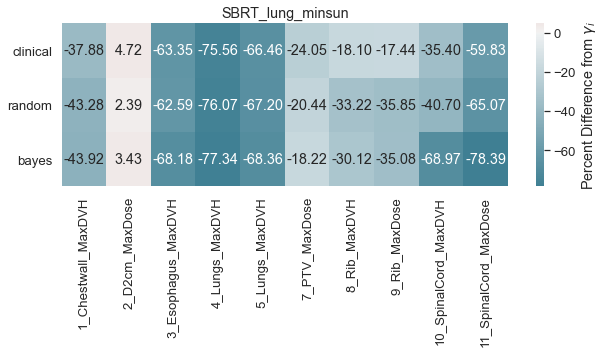

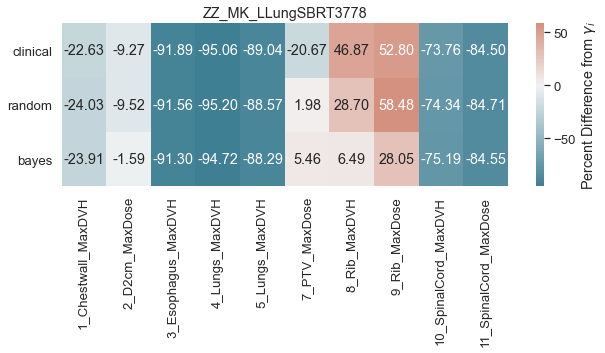

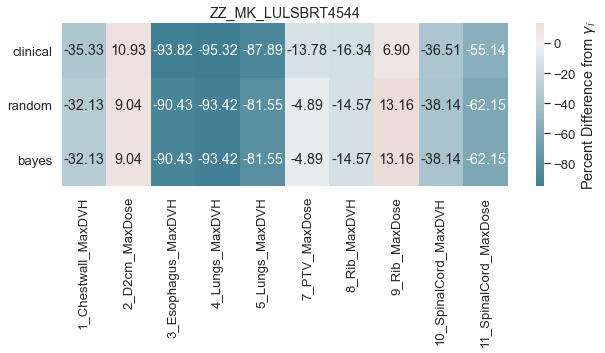

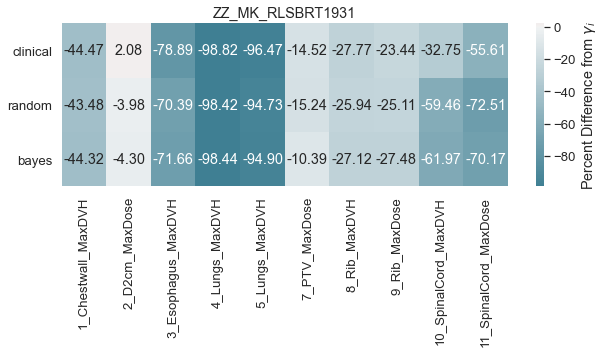

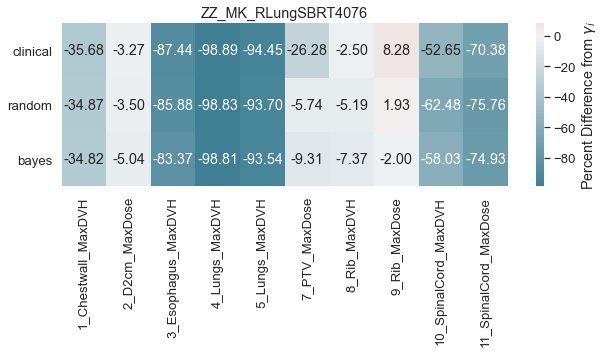

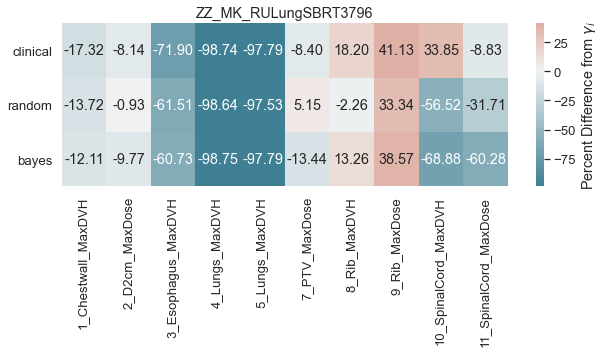

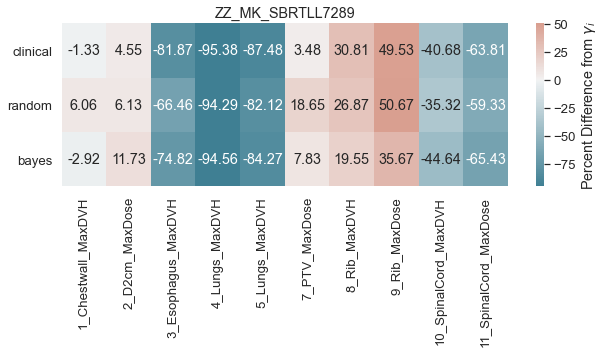

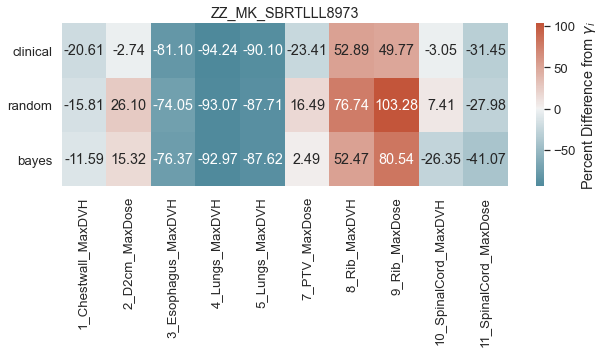

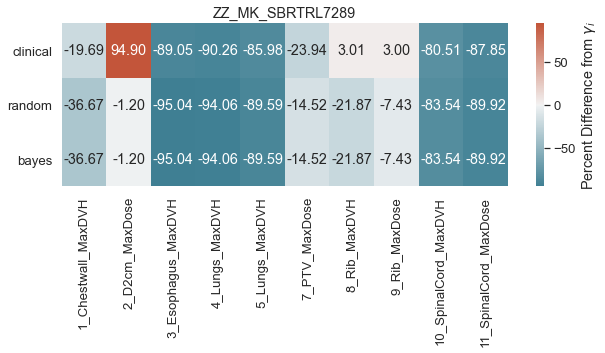

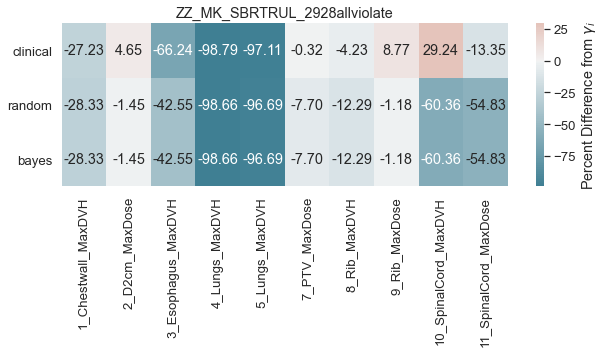

In [18]:
heatmap(stop_df, 'plan_type', ['clinical', 'random', 'bayes'], 'goal_diff', '$\gamma_i$')

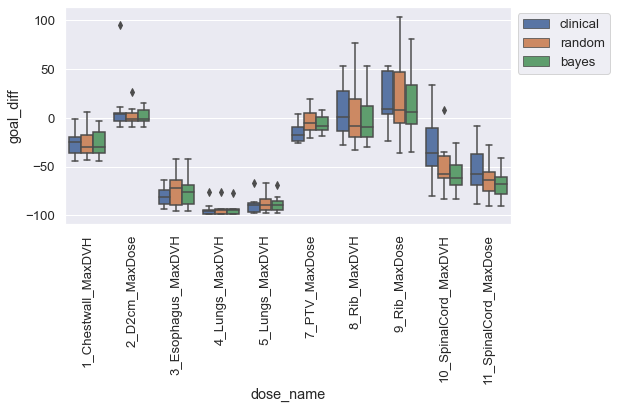

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='goal_diff', hue='plan_type', data=stop_df, ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

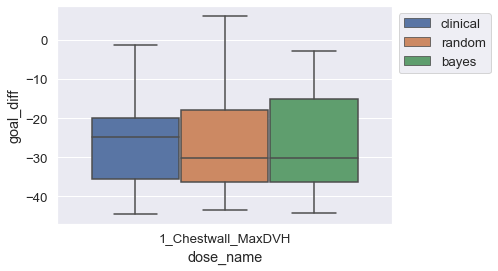

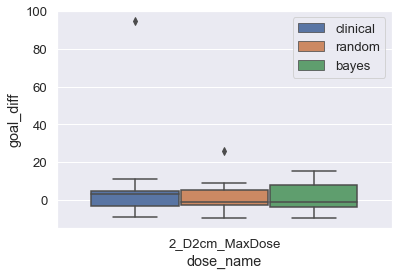

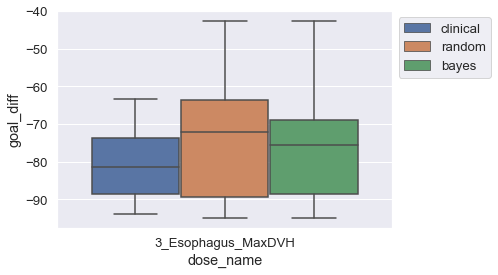

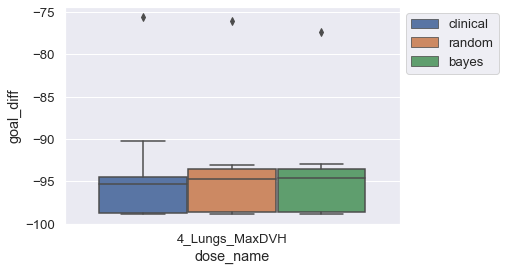

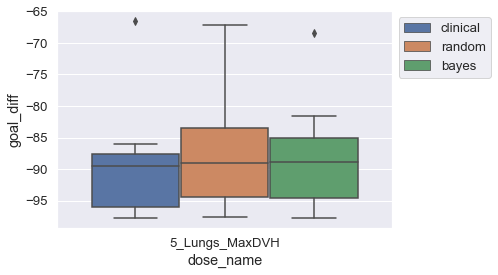

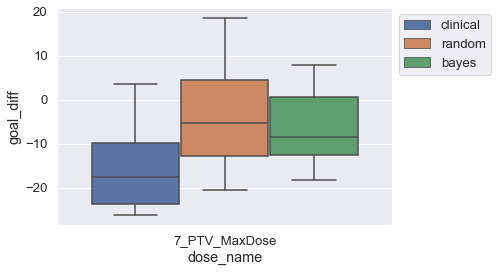

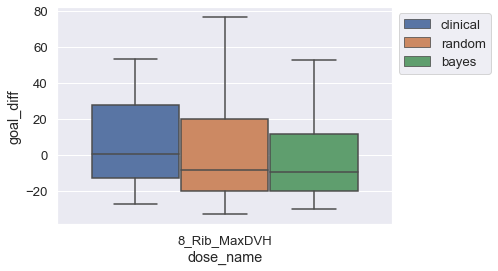

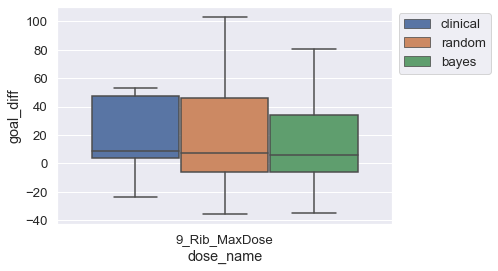

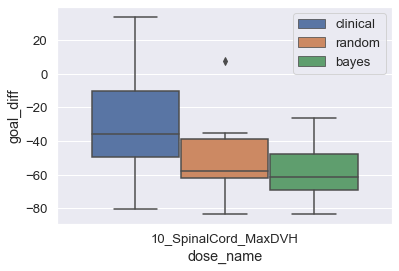

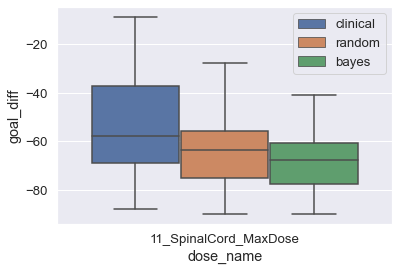

In [20]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='goal_diff', hue='plan_type', data=stop_df[stop_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Compare plans

In [21]:
compare_df = pd.concat([get_compare(*pair, stop=True) for pair in pair_list]).reset_index(drop=True)
compare_df.groupby(['compare_type', 'dose_name']).describe()

plan_diff                        \
                                          count       mean        std   
compare_type    dose_name                                               
bayes2clinical  10_SpinalCord_MaxDVH       10.0 -30.707437  27.657219   
                11_SpinalCord_MaxDose      10.0 -25.008935  19.492209   
                1_Chestwall_MaxDVH         10.0  -1.141343   9.014030   
                2_D2cm_MaxDose             10.0  -3.399395  17.838058   
                3_Esophagus_MaxDVH         10.0  23.490235  35.860601   
                4_Lungs_MaxDVH             10.0   9.169694  22.382057   
                5_Lungs_MaxDVH             10.0  15.405761  23.227054   
                7_PTV_MaxDose              10.0  11.624966  14.339722   
                8_Rib_MaxDVH               10.0  -8.978355  10.226599   
                9_Rib_MaxDose              10.0  -5.630494  11.792766   
bayes2random    10_SpinalCord_MaxDVH       10.0 -11.959320  18.364676   
                11_SpinalCord_MaxDose      10.0 -10.012509  17.769638   
                1_Chestwall_MaxDVH         10.0  -0.395716   3.371360   
                2_D2cm_MaxDose             10.0  -0.433460   5.364834   
                3_Esophagus_MaxDVH         10.0  -3.025822  11.455624   
                4_Lungs_MaxDVH             10.0  -0.636489   4.933615   
                5_Lungs_MaxDVH             10.0  -2.397355   5.127115   
                7_PTV_MaxDose              10.0  -3.068688   7.544372   
                8_Rib_MaxDVH               10.0  -2.013743   9.191281   
                9_Rib_MaxDose              10.0  -4.224326   7.120363   
random2clinical 10_SpinalCord_MaxDVH       10.0 -20.596908  29.152716   
                11_SpinalCord_MaxDose      10.0 -15.878666  18.453306   
                1_Chestwall_MaxDVH         10.0  -0.727443   8.589086   
                2_D2cm_MaxDose             10.0  -2.648152  19.384951   
                3_Esophagus_MaxDVH         10.0  28.861480  39.951548   
                4_Lungs_MaxDVH             10.0  10.000581  22.533387   
                5_Lungs_MaxDVH             10.0  18.539866  24.476106   
                7_PTV_MaxDose              10.0  15.714573  17.018377   
                8_Rib_MaxDVH               10.0  -6.623265  11.924577   
                9_Rib_MaxDose              10.0  -0.908505  15.165755   

                                                                        \
                                             min        25%        50%   
compare_type    dose_name                                                
bayes2clinical  10_SpinalCord_MaxDVH  -76.751439 -49.836874 -19.771975   
                11_SpinalCord_MaxDose -56.432580 -42.856754 -16.310183   
                1_Chestwall_MaxDVH    -21.143539  -1.643098  -0.612175   
                2_D2cm_MaxDose        -49.309389  -4.824913  -1.734882   
                3_Esophagus_MaxDVH    -54.647274  11.762204  33.352084   
                4_Lungs_MaxDVH        -39.046786   1.365327   8.946440   
                5_Lungs_MaxDVH        -25.746506   1.667872  15.638363   
                7_PTV_MaxDose          -7.408813   4.363690   8.987614   
                8_Rib_MaxDVH          -27.493515 -13.165579  -6.706587   
                9_Rib_MaxDose         -21.362684  -9.970506  -9.206594   
bayes2random    10_SpinalCord_MaxDVH  -47.666430 -24.928419  -4.748171   
                11_SpinalCord_MaxDose -41.831193 -17.378979   0.000005   
                1_Chestwall_MaxDVH     -8.472024  -0.836079   0.000020   
                2_D2cm_MaxDose         -8.919298  -1.274381   0.000000   
                3_Esophagus_MaxDVH    -24.924927  -7.774530  -0.000074   
                4_Lungs_MaxDVH         -8.167342  -3.761305  -0.000310   
                5_Lungs_MaxDVH        -12.039666  -3.488149  -0.000085   
                7_PTV_MaxDose         -17.679332  -7.782362   0.000007   
                8_Rib_MaxDVH          -17.256010  -4.899519  -0.795456   


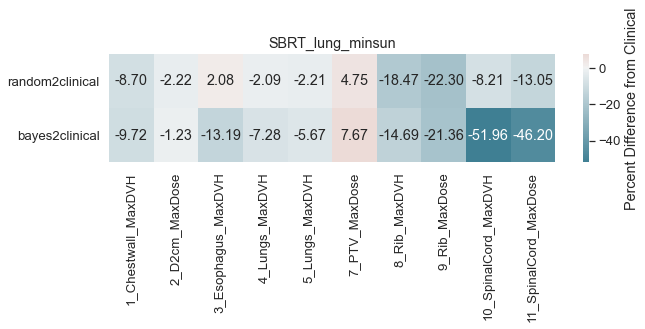

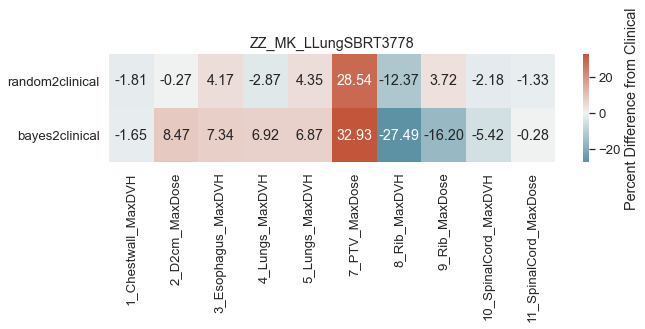

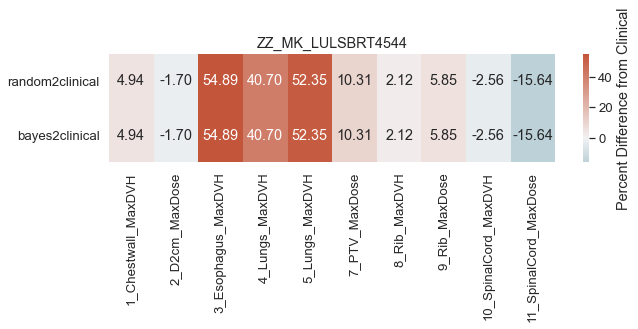

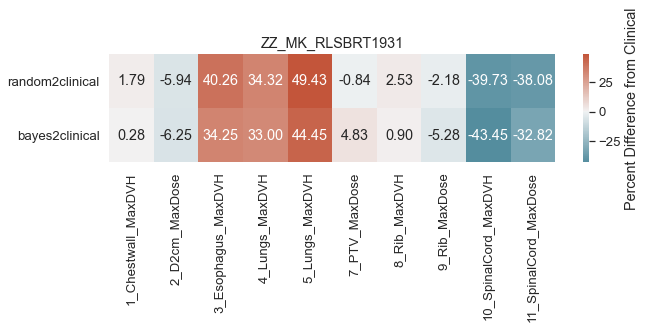

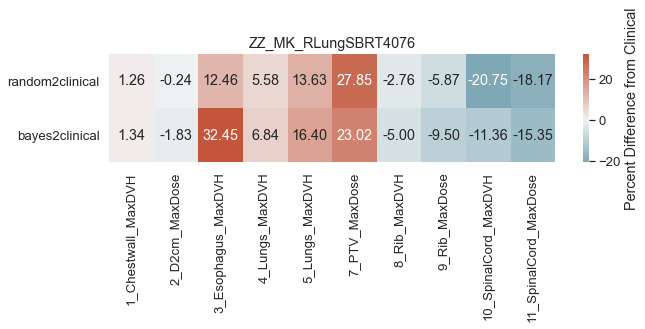

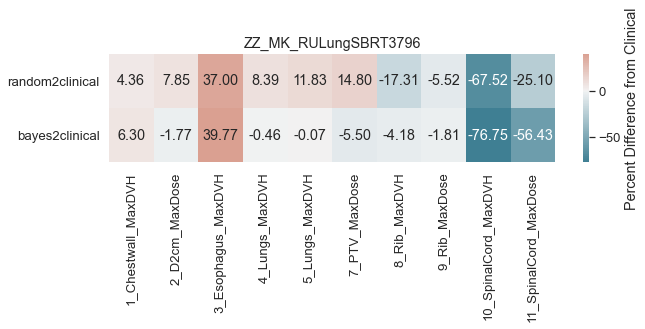

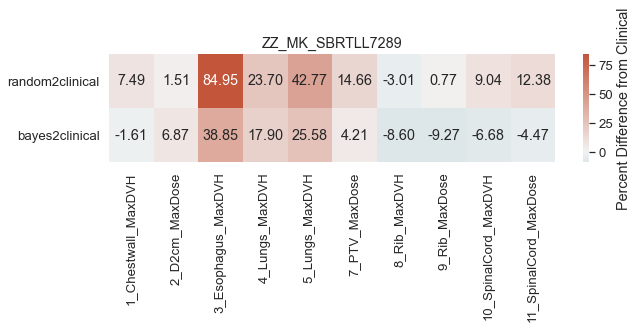

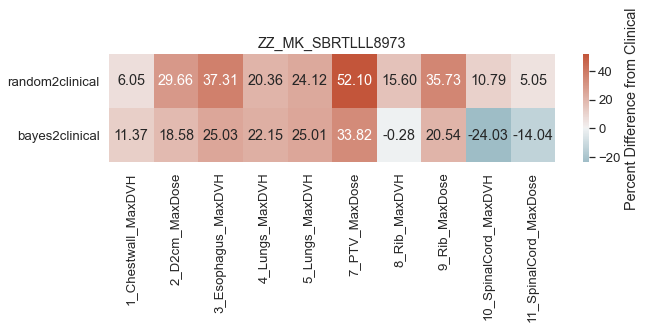

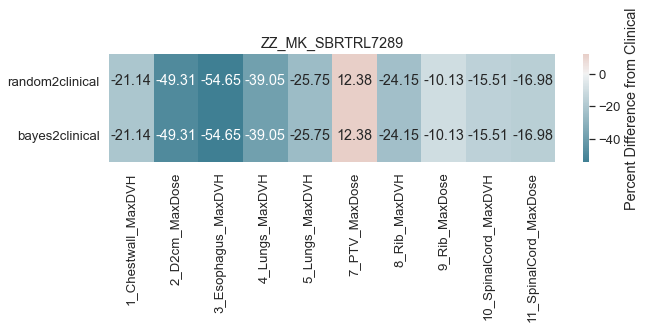

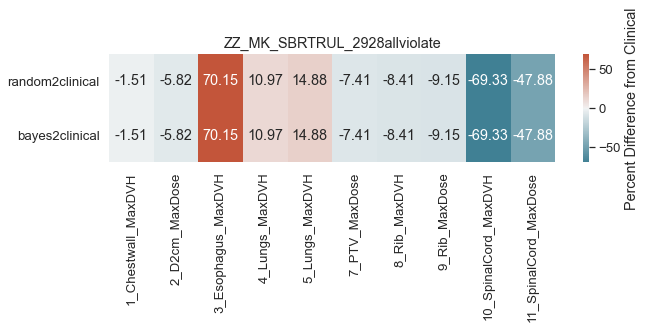

In [22]:
heatmap(compare_df, 'compare_type', ['random2clinical', 'bayes2clinical'], 'plan_diff', 'Clinical')

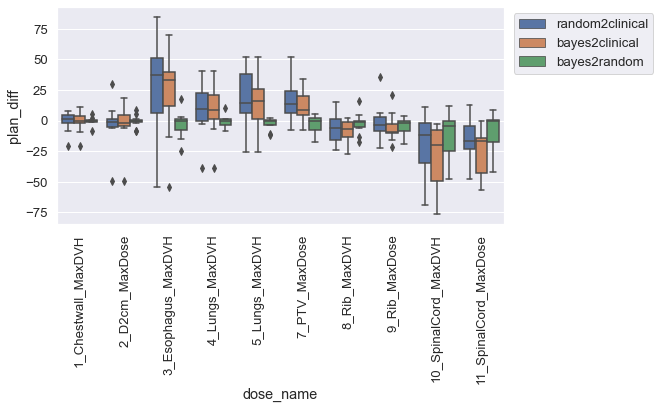

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='plan_diff', hue='compare_type', data=compare_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.35, 1));

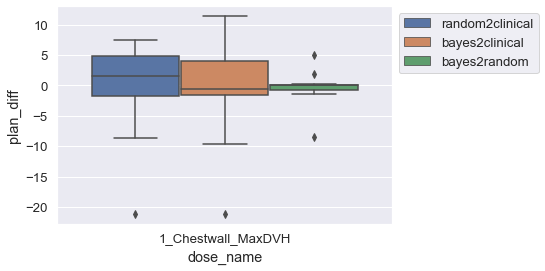

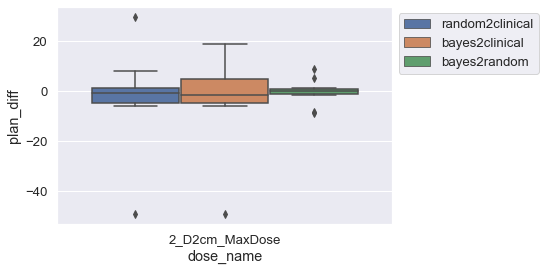

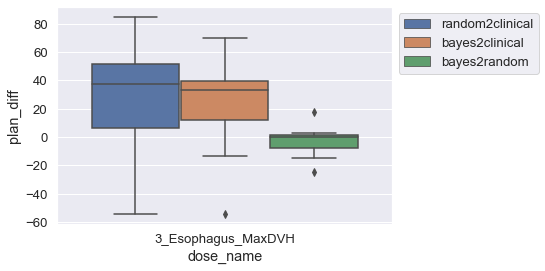

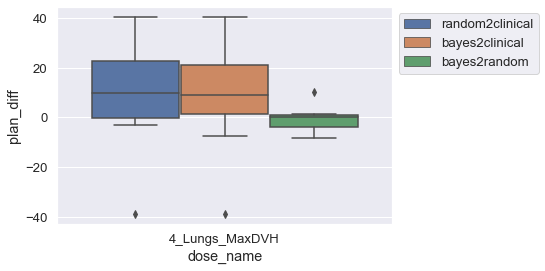

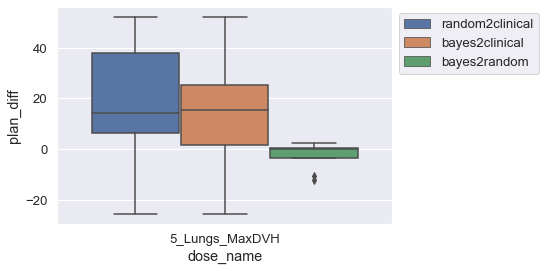

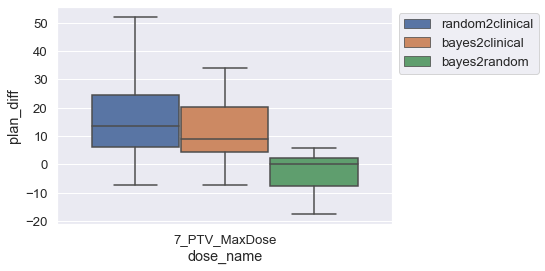

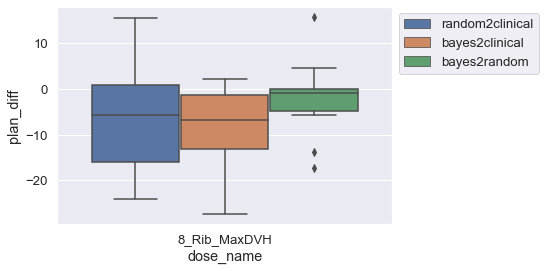

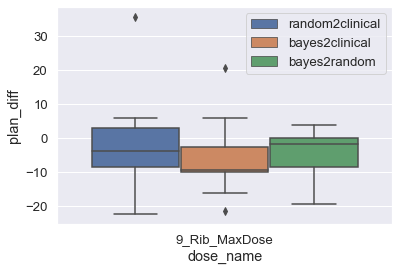

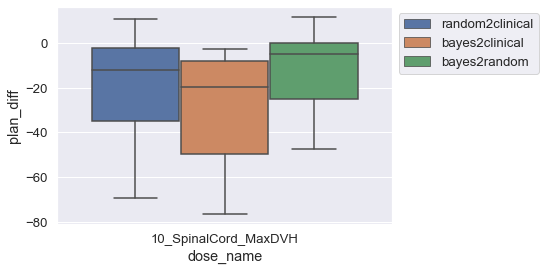

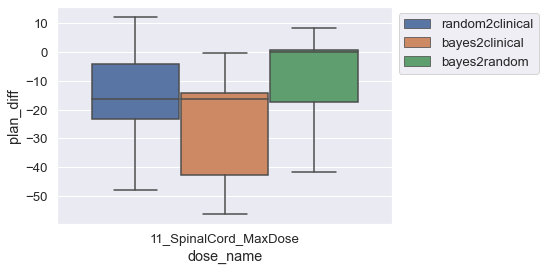

In [24]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='plan_diff', hue='compare_type', data=compare_df[compare_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Compare to 100 iterations

In [25]:
def get_dose_diff(row):
    return get_percent_diff(row, 'dose_val_stop', 'dose_val_full')

compare_df = pd.merge(
    full_df.drop(columns='goal_diff'),
    stop_df.drop(columns='goal_diff'),
    on=['patient', 'plan_type', 'dose_name', 'goal_val'],
    suffixes=['_full', '_stop']
)
compare_df = compare_df[compare_df['plan_type'].isin(['random', 'bayes'])]
compare_df['dose_diff'] = compare_df.apply(get_dose_diff, axis=1)
compare_df.groupby(['dose_name','plan_type'])['dose_diff'].describe()

count       mean        std        min  \
dose_name             plan_type                                           
10_SpinalCord_MaxDVH  bayes       10.0  24.931398  33.516089   0.000000   
                      random      10.0  12.896855  29.400846 -24.171602   
11_SpinalCord_MaxDose bayes       10.0  19.939842  26.785072   0.000000   
                      random      10.0  17.244820  18.904990  -1.610563   
1_Chestwall_MaxDVH    bayes       10.0  -0.855892   1.769314  -3.728794   
                      random      10.0  -1.384504   3.600362  -8.692009   
2_D2cm_MaxDose        bayes       10.0   1.803716   5.719884  -3.455248   
                      random      10.0   4.845876   5.169970   0.000000   
3_Esophagus_MaxDVH    bayes       10.0   1.989814   8.676224 -13.848654   
                      random      10.0  10.690072  29.408368 -14.707694   
4_Lungs_MaxDVH        bayes       10.0  -0.234367   2.720576  -4.387460   
                      random      10.0  -1.048101   7.338348 -17.179360   
5_Lungs_MaxDVH        bayes       10.0   0.933698   3.200018  -3.208975   
                      random      10.0  -1.092257   6.098921 -11.447546   
7_PTV_MaxDose         bayes       10.0   5.030307   9.724895  -3.085105   
                      random      10.0   9.743545  13.636580  -8.333604   
8_Rib_MaxDVH          bayes       10.0   0.412285   5.343690  -5.763380   
                      random      10.0   0.729253   9.556809  -8.683950   
9_Rib_MaxDose         bayes       10.0   0.378122   5.117023  -6.891865   
                      random      10.0   3.572396  12.077900  -7.747660   

                                      25%        50%        75%        max  
dose_name             plan_type                                             
10_SpinalCord_MaxDVH  bayes      1.610691   7.230473  47.581685  91.342698  
                      random    -1.698466   2.052163  30.603541  62.287876  
11_SpinalCord_MaxDose bayes      1.712371   9.981252  23.715696  80.601528  
                      random     0.386091  12.138025  35.783806  43.362399  
1_Chestwall_MaxDVH    bayes     -1.235250  -0.936827  -0.026421   1.885843  
                      random    -3.308619  -0.731777   0.576494   4.107542  
2_D2cm_MaxDose        bayes     -2.742273   0.629386   4.745867  14.215612  
                      random     1.489905   2.849999   5.407719  15.164330  
3_Esophagus_MaxDVH    bayes     -2.885823   3.726432   8.574616  13.701615  
                      random    -2.675614   1.208371  13.976477  88.080131  
4_Lungs_MaxDVH        bayes     -1.933332  -0.071439   1.270486   4.626234  
                      random    -2.069017   0.191591   1.574734   9.888098  
5_Lungs_MaxDVH        bayes     -1.180158   0.303810   2.300473   6.764948  
                      random    -3.112543   0.433469   1.555023   7.872091  
7_PTV_MaxDose         bayes     -1.032643   0.661421   5.323300  23.655109  
                      random     0.149927   8.153136  15.592459  35.913501  
8_Rib_MaxDVH          bayes     -3.422148  -0.756379   2.106785  10.412523  
                      random    -4.810639  -2.589566   0.499881  21.890987  
9_Rib_MaxDose         bayes     -1.582630  -0.494055   4.019886   9.539903  
                      random    -3.760990   0.482136   3.749202  32.282650

In [ ]:
heatmap(compare_df, 'plan_type', ['random', 'bayes'], 'dose_diff', 'Full 100')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='dose_diff', hue='plan_type', data=compare_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.35, 1));

In [ ]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='dose_diff', hue='plan_type', data=compare_df[compare_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));